####**Student Information**

Name: WHENTY ARIYANTI

Student ID: 109162862

GitHub ID: https://github.com/wh-ariyanti



---



# **(20%) FIRST - DO TAKE HOME EXERCISE IN LAB 2**


> do the take home exercises in the SNHCC-DM2020-Lab2-Master Repo. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade.



**PREPARATION**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd 'drive/My Drive/SINICA/TIGP/COURSE/2020_FALL/DATAMINING/HOMEWORK2'

/content/drive/My Drive/SINICA/TIGP/COURSE/2020_FALL/DATAMINING/HOMEWORK2


In [4]:
ll

total 3699
-rw------- 1 root 3766318 Dec 14 11:32  109162862_WHENTY_ARIYANTI_HW2.ipynb
-rw------- 1 root    1040 Nov 25 09:55 'data_mining_helpers (1).py'
-rw------- 1 root    1040 Dec 13 12:06 'data_mining_helpers (2).py'
-rw------- 1 root    1040 Dec 13 14:52 'data_mining_helpers (3).py'
-rw------- 1 root    1040 Dec 14 08:50 'data_mining_helpers (4).py'
-rw------- 1 root    1040 Nov 24 13:19  data_mining_helpers.py
drwx------ 2 root    4096 Nov 24 13:01  dataset/
drwx------ 2 root    4096 Nov 24 12:46  helpers/
drwx------ 2 root    4096 Nov 24 13:19  __pycache__/
-rw------- 1 root     136 Dec 13 21:27  vocabulary_tfidf.pkl


In [5]:
import sys
import os

py_file_location = "/helpers"
sys.path.append(os.path.abspath(py_file_location))

In [7]:
ll 'helpers'

total 6
-rw------- 1 root 1040 Dec 14 11:32 data_mining_helpers.py
-rw------- 1 root  190 Nov 17 11:45 __init__.py
-rw------- 1 root 3538 Nov 17 11:45 text_analysis.py


In [6]:
from google.colab import files
src = list(files.upload().values())[0]
open('helpers/data_mining_helpers.py','wb').write(src)
import data_mining_helpers as dmh

Saving data_mining_helpers.py to data_mining_helpers (5).py


In [8]:
import data_mining_helpers as dmh

In [9]:
import plotly.express as py
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
#import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

In [10]:
categories=['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
twenty_train=fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [11]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [12]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [13]:
import pandas as pd

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [14]:
len(X)

2257

In [15]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [16]:
# add category to the dataframe
X['category'] = twenty_train.target

In [17]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [18]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


**Exercise 1 (5 min):**
> In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [19]:
twenty_train.data[0:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Exercise 2 (take home)**


> Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.



In [20]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [21]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [22]:
#print out last 10 row in our dataset
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [23]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0


In [24]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [25]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


In [26]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [27]:
X.sort_index()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


**Exercise 3 (5 min)**


> Try to fecth records belonging to the **comp.graphics** category, and query every 10th record. Only show the first 5 records.



In [28]:
#To filter the records which only belong to comp.graphics category
X_filter=X.loc[X.category_name == "comp.graphics"]

In [29]:
#Only show first 5 category
X_filter[0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics


**Exercise 4 (5 min)**


> Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
$Hint$ : axis parameter. Check the documentation for more information.



In [30]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
#dummy_series
result_with_series = X.append(dummy_series, ignore_index=True)
# check if the records was commited into result
#len(result_with_series)

**ANSWER EXERCISE 4**

In [31]:
X.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

**Exercise 5 (take home)**


> There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
$Hint$ : why .isnull() didn't work?



In [32]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [33]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer**


> It's didn't work because isnull will only return a boolean same-sized object indicating if the values are **NA**. Which is **NA** here is NA values, such as None or numpy.NaN Its only working on : 
*   index 0 because it's an NA values (np.nan).
*   index 1 because it's an NA values
*   index 4 because None also consider as NA values

> It's didn't work on index 2, 3, and 5 because :
*   index 2 it's an empty string. empty string is not considered as NA values
*   index 3 it's an string values. Everything inside '' is considered as string values.
*   index 5 it's an empty sting. and empty string is not considered as NA values.








**Exercise 6 (take home)**


> Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.



Preparation

In [34]:
X_sample = X.sample(n=1000) #random state

In [35]:
len(X_sample)

1000

In [36]:
X_sample[0:4]

,text,category,category_name
959,From: Desiree_Bradley@mindlink.bc.ca (Desiree ...,3,soc.religion.christian
1349,From: nancyo@fraser.sfu.ca (Nancy Patricia O'C...,0,alt.atheism
1004,From: steve@hcrlgw (Steven Collins) Subject: S...,1,comp.graphics
1667,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...,3,soc.religion.christian


In [37]:
X_sample = X.sample(n=1000) #random state
X_sample[0:4]

,text,category,category_name
196,From: steveq@DIALix.oz.au (Steve Quartly) Subj...,1,comp.graphics
1506,howland.reston.ans.net!europa.eng.gtefsd.com!...,0,alt.atheism
420,From: sherry@a.cs.okstate.edu (SHERRY ROBERT M...,1,comp.graphics
609,From: Ivanov Sergey <serge@argus.msk.su> Subje...,1,comp.graphics


**Answer**

> **Yes**. There's a change on the dataframe every I run the code.

> it will pull a random row or column sample of my dataframe X. so every I run the code again, the data sample that shown will be different.

> n here mean that the number of sample that we want to return. And from that code we can know that n=1000 mean that we choose 1000 samples randomly from X


**Exercise 8 (take home)**


> We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.



**Prepration**

In [38]:
import matplotlib.pyplot as plt

In [39]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


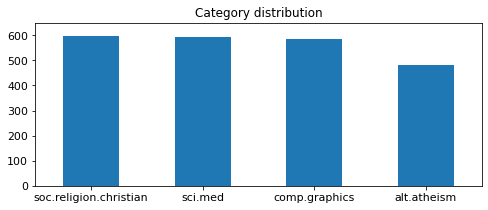

In [40]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X_ori=X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   295
soc.religion.christian    256
comp.graphics             250
alt.atheism               199
Name: category_name, dtype: int64


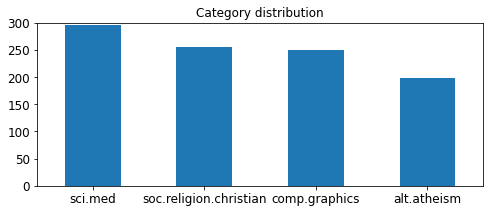

In [41]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_samp=X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

**Answer Exercise 8**

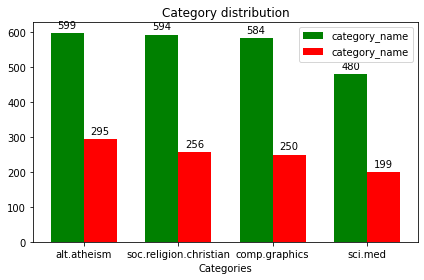

In [42]:
fig, ax = plt.subplots()
x=np.arange(len(categories))
width=0.35
rects1 = ax.bar(x - width/2, X.category_name.value_counts(), width, label='category_name',color='green')
rects2 = ax.bar(x + width/2, X_sample.category_name.value_counts(), width, label='category_name',color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()




---


One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the sample feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.




**Exercise 10 (take home)**


> We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.



**Preparation**

In [43]:
import nltk

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [46]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [47]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [48]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [50]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [51]:
X_counts.shape

(2257, 35788)

In [52]:
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

In [53]:
X[0:5]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."


In [54]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

**Answer Exerise 10**

In [55]:
#TASK : PROOF that the 1 at the beginning of the fifth record (Index 4) represents the 00 term
corpus4=X_counts[0:5,0:100].toarray()

In [56]:
count_vect.inverse_transform(corpus4[4])
#this mean that 1 in the beginning on fifth record represent 00, and another 1 in the fifth record represent 01

[array(['00', '01'], dtype='<U80')]

**Exercise 11 (take home)**


> From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization



**Preparation**

In [57]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [58]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [59]:
len(count_vect.get_feature_names())

35788

In [60]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [61]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [62]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [63]:
plot_z = X_counts[0:20, 0:20].toarray()

In [64]:
plot_z.shape

(20, 20)

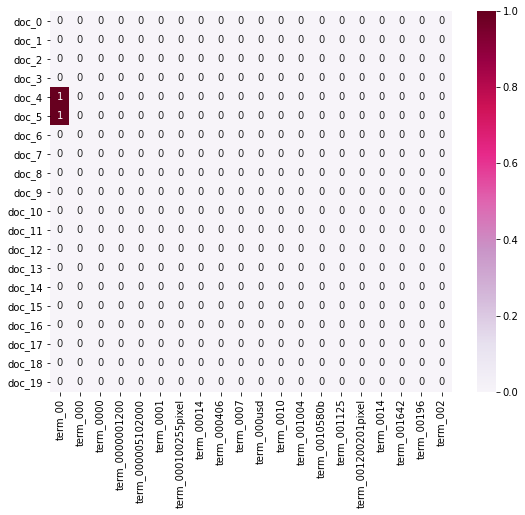

In [65]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**Answer Exercise 11**



> Because the vocabulary is too many, it's quite impossible either not effective way to plot all of those features using SNS heatmap (I have memory problem either). So I try to find another way to do that. I will explain what I am doing here.


> I am using token frequency distribution visualizer. Here I provide the frequency of each vocabulary item in the corpus in a bar chart. Besides counting single words. This visualizer could count any kind of observable event such as bigram, trigram, and even combinations.


> It's a distribution because it will tell us how the total number of word tokens in the text are distributed across the vocabulary items. This visualizer creates a dsitribution plot after the corpus data is already tokenized and vectorized.


> First, I have to tokenizing and vectorizing the corpus data using CountVectorizer, I instatiate a FreqDisctVisualizer object and then call fit() on that object with the count vectorized documents and the features (i.e. the words from the corpus) which compute the frequency distribution. This will display the top 50 most frequent items in the corpus with the terms listed along the y-axis and frequency counts despicted at x-axis values.









In [66]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



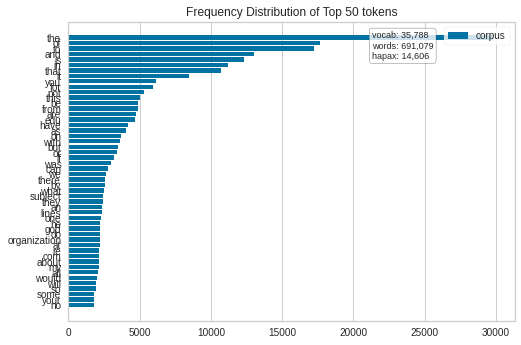

In [67]:

features_names=count_vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features_names)
visualizer.fit(X_counts)
visualizer.poof()

**Exercise 12 (take home)**


> Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.



**PREPARATION**

In [68]:
from sklearn.decomposition import PCA

In [69]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [70]:
X_reduced.shape

(2257, 2)

In [71]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

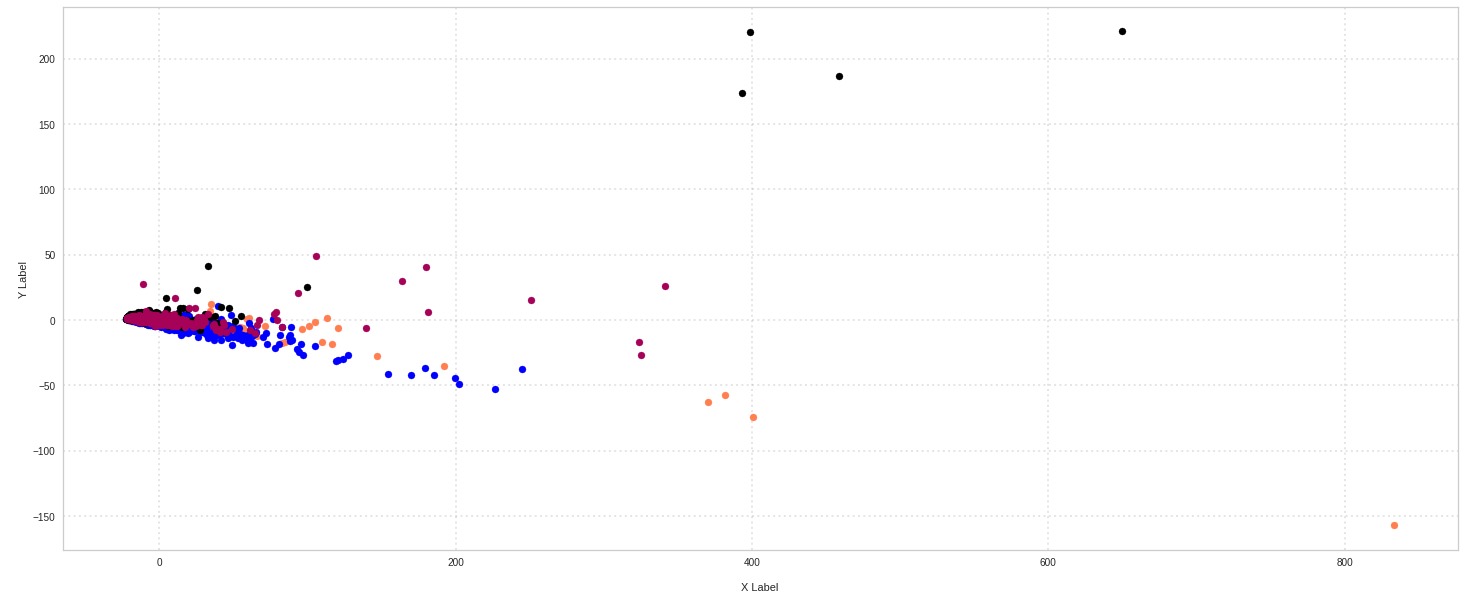

In [72]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

**ANSWER EXERCISE 12**

In [73]:
X_reduced_new = PCA(n_components=3).fit_transform(X_counts.toarray())

In [74]:
X_reduced_new.shape

(2257, 3)

In [75]:
from mpl_toolkits.mplot3d import Axes3D 

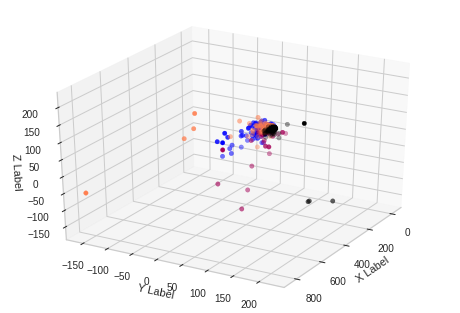

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_new[X['category_name'] == category].T[0]
    ys = X_reduced_new[X['category_name'] == category].T[1]
    zs = X_reduced_new[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=30)
plt.show()

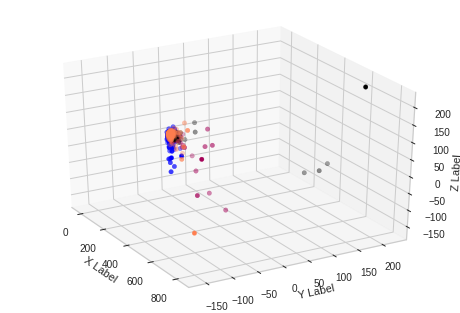

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_new[X['category_name'] == category].T[0]
    ys = X_reduced_new[X['category_name'] == category].T[1]
    zs = X_reduced_new[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=-30)
plt.show()

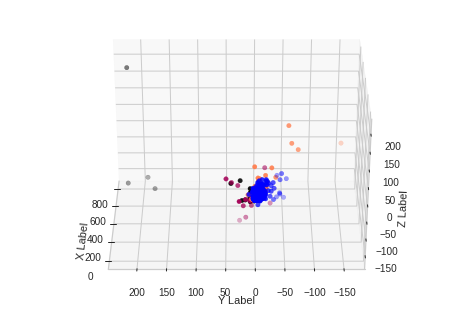

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_new[X['category_name'] == category].T[0]
    ys = X_reduced_new[X['category_name'] == category].T[1]
    zs = X_reduced_new[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=180)
plt.show()

**Exercise 13 (take home)**


> If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.



**ANSWER EXERCISE 13**

In [79]:
pip install plotly

In [80]:
!pip install chart_studio

     |████████████████████████████████| 71kB 6.8MB/s 


In [81]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [82]:
from plotly.offline import iplot

In [83]:
def get_trace(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False),0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

In [84]:
trace1 = get_trace(X_reduced_new, X["category_name"], "alt.atheism", "rgb(71,233,163)")
trace2 = get_trace(X_reduced_new, X["category_name"], "soc.religion.christian", "rgb(52,133,252)")
trace3 = get_trace(X_reduced_new, X["category_name"], "comp.graphics", "rgb(229,65,136)")
trace4 = get_trace(X_reduced_new, X["category_name"], "sci.med", "rgb(99,151,68)")

In [85]:
data = [trace1, trace2, trace3, trace4]

In [86]:
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

**Exercise 14 (take home)**


> The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.



**PREPARATION**

In [87]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [88]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [89]:
term_frequencies[0]

134

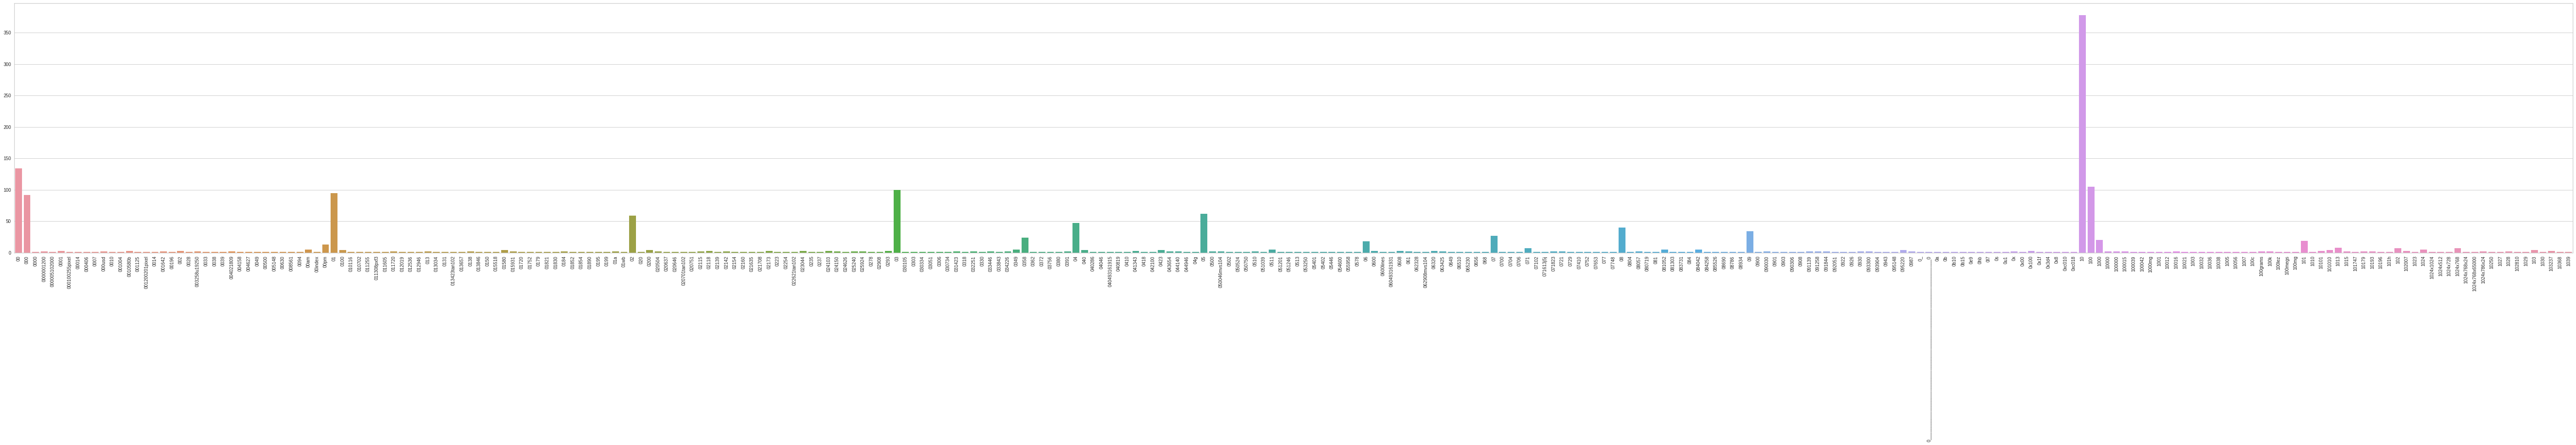

In [90]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [91]:
def plot_word_frequency(word_list, plot_title):
    trace1 = {
        "x": list(word_list[0]),
        "y": list(word_list[1]),
        "type": "bar"
    }

    data = go.Data([trace1])

    layout = {
        "title": plot_title,
        "yaxis": {"title": "Frequency"}
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

**ANSWER EXERCISE 14**

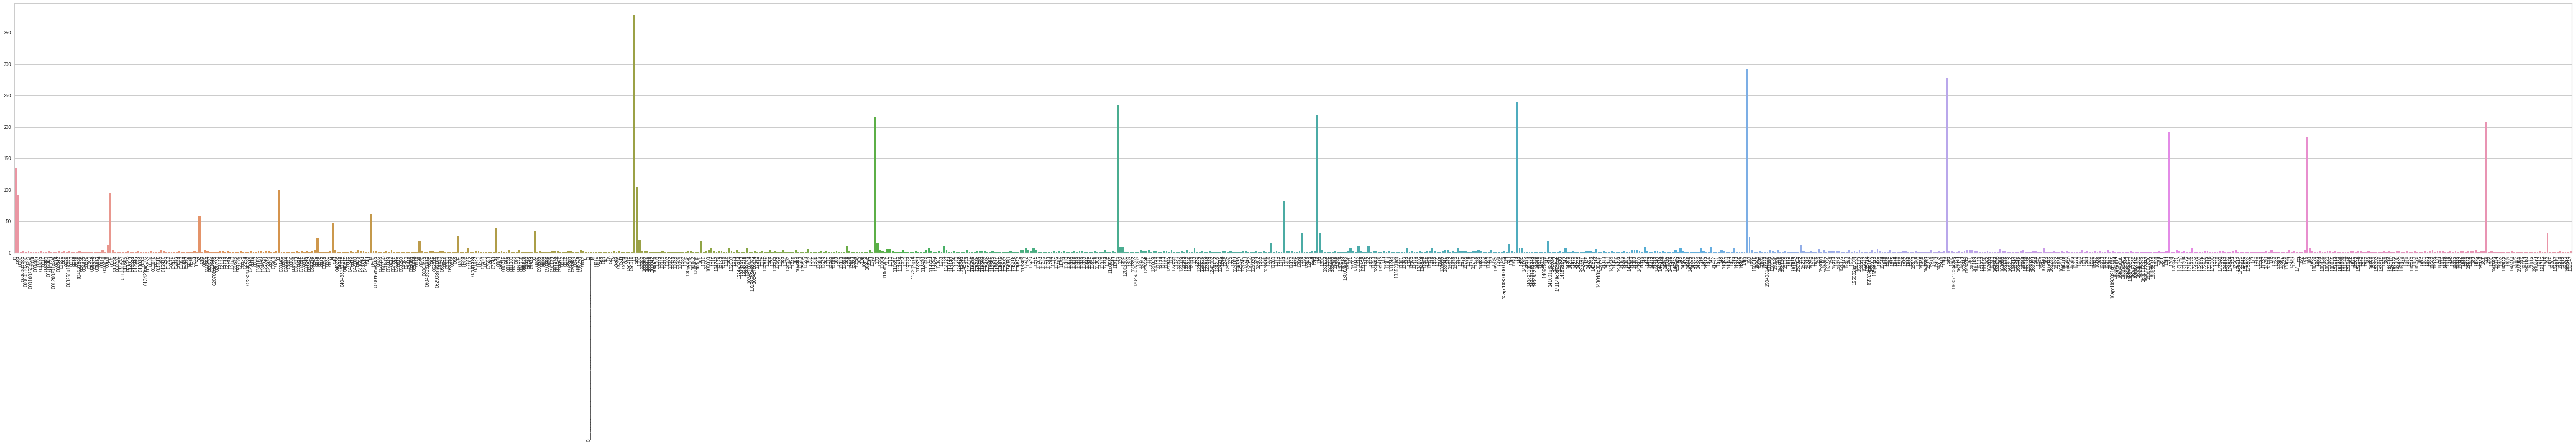

In [92]:
plt.subplots(figsize=(100, 10))
list1 = term_frequencies
list2 = count_vect.get_feature_names()
g = sns.barplot(x=list2[:1000], 
            y=list1[:1000])
g.set_xticklabels(list2, rotation = 90);

In [93]:
list1 = term_frequencies
list2 = count_vect.get_feature_names()

iplot(plot_word_frequency([list2, list1[0:1000]],
                                "Term Frequency Distribution, first 1000 terms"))

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




**Exercise 15 (take home)**


> Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below



**ANSWER EXERCISE 15**

In [94]:
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

iplot(plot_word_frequency([list2, list1[0:500]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [95]:
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

iplot(plot_word_frequency([list2, list1[0:1000]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




**Exercise 16 (take home)**


> Try to generate the binarization using the category_name column instead. Does it work?



**PREPARATION**

In [96]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [97]:
mlb = preprocessing.LabelBinarizer()

In [98]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [99]:
mlb.classes_

array([0, 1, 2, 3])

In [100]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [101]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


**ANSWER EXERCISE 16**

In [102]:
mlb.fit(X.category_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [103]:
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [104]:
X['bin_category2'] = mlb.transform(X['category_name']).tolist()

In [105]:
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category2
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"



> **YES** IT'S WORK (see column bin_category2)



# **(30%) SECOND - FOLLOW SAME PROCESS LAB 2 WITH NEW DATASET**


> follow the same process from the SNHCC-DM2020-Lab2-Master Repo on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.


*   Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.
*   You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.





**DATA PREPARATION**


> **DATA SOURCE** = IMDB, AMAZON, YELP


> Because I already load some library above, so here we only need to repeat some steps.


> The total data after I load those three dataset should be 3000 bcs each dataset contain 1000 records







In [106]:
ll 'dataset/'

total 202
-rw------- 1 root 58226 Jul  5  2016 amazon_cells_labelled.txt
-rw------- 1 root 85285 Feb 14  2015 imdb_labelled.txt
-rw------- 1 root  1070 May 30  2015 readme.txt
-rw------- 1 root 61320 Jul  5  2016 yelp_labelled.txt


In [107]:
class Sentence:
    def __init__(self):
        self.sid = []
        self.data = []
        self.score =[]
        self.score_name =[]

# location of the data (in drive)
dataset_files = ['dataset/amazon_cells_labelled.txt', 
                 'dataset/imdb_labelled.txt', 
                 'dataset/yelp_labelled.txt']

sentence = Sentence()

In [108]:
import re

In [109]:
#Here I decide to use regular expression bcs if I load the data directly and only split using "\t", for IMDB dataset will only load around 740 records
for fileName in dataset_files:
    with open (fileName, encoding = 'utf8') as input_fs:
        # Use last digit in sentence (RegularExperssion)
        pattern = re.compile(r"(\d+)$")
        for index, line in enumerate(input_fs):
            sentence.sid.append(index)
            # Because if I didnt use this for IMDB will only load around 740 records.
            sentence.data.append(line.rsplit('\t', 1)[0])
            has = pattern.search(line)
            sentence.score.append(has.group(0))
            if (has.group(0)== "1"):
                sentence.score_name.append("Positive")
            else:
                sentence.score_name.append("Negative")

**CONVERT DATA INTO DATAFRAME**

In [110]:
X_newds = pd.DataFrame.from_records(dmh.format_rows(sentence), columns= ['sentence'])

**ADDING COLUMN**

In [111]:
X_newds['score']=sentence.score
X_newds['score_name']=sentence.score_name

In [112]:
#Check to make sure my data is correct
len(X_newds)

3000

In [113]:
X_newds.head()

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive


**FAMILIARIZING WITH THE DATA**

In [114]:
X_newds[0:10][["sentence","score_name"]]

,sentence,score_name
0,So there is no way for me to plug it in here i...,Negative
1,"Good case, Excellent value.",Positive
2,Great for the jawbone.,Positive
3,Tied to charger for conversations lasting more...,Negative
4,The mic is great.,Positive
5,I have to jiggle the plug to get it to line up...,Negative
6,If you have several dozen or several hundred c...,Negative
7,If you are Razr owner...you must have this!,Positive
8,"Needless to say, I wasted my money.",Negative
9,What a waste of money and time!.,Negative


In [115]:
X_newds[0:10]['score']

0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: score, dtype: object

In [116]:
X_newds.iloc[::10, :][0:10]

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
10,And the sound quality is great.,1,Positive
20,I went on Motorola's website and followed all ...,0,Negative
30,"This is a simple little phone to use, but the ...",0,Negative
40,"It has a great camera thats 2MP, and the pics ...",1,Positive
50,Not loud enough and doesn't turn on like it sh...,0,Negative
60,Essentially you can forget Microsoft's tech su...,0,Negative
70,Mic Doesn't work.,0,Negative
80,I wear it everyday and it holds up very well.,1,Positive
90,For a product that costs as much as this one d...,0,Negative


In [117]:
print(type(X_newds['score']))

<class 'pandas.core.series.Series'>


In [ ]:
X_newds.sort_values(by = "score")

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
1598,Every element of this story was so over the to...,0,Negative
1591,Which is precisely why I am giving it such a b...,0,Negative
1590,I can't believe there's even a sequel to this!,0,Negative
1589,"Beware: this is not a trashy cult movie, this ...",0,Negative
...,...,...,...
591,Linked to my phone without effort.,1,Positive
1775,You won't forget this movie!,1,Positive
1774,Also the music by Mark Snow is possibly the be...,1,Positive
1772,You learn a lot about the real inside emotions...,1,Positive


In [ ]:
X_newds['score_name']='Positive'
X_newds[0:10]

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Positive
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Positive
4,The mic is great.,1,Positive
5,I have to jiggle the plug to get it to line up...,0,Positive
6,If you have several dozen or several hundred c...,0,Positive
7,If you are Razr owner...you must have this!,1,Positive
8,"Needless to say, I wasted my money.",0,Positive
9,What a waste of money and time!.,0,Positive


**DATA MINING USING PANDAS**



> **MISSING VALUES**





In [118]:
X_newds.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [119]:
X_newds.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [120]:
X_newds.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [121]:
# show the missing value in row
X_newds[X_newds.isnull().any(axis=1)]

,sentence,score,score_name


In [122]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [123]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [124]:
result_with_series = X_newds.append(dummy_series, ignore_index=True)

In [125]:
len(result_with_series)

3001

In [126]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [127]:
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [128]:
X_newds = X_newds.append(dummy_dict,ignore_index=True)

In [129]:
len(X_newds)

3001

In [130]:
X_newds.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [131]:
X_newds.dropna(inplace=True)

In [132]:
X_newds.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


**DEALING WITH DUPLICATE DATA**

In [133]:
X_newds.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [134]:
sum(X_newds.duplicated())

17

In [135]:
sum(X_newds.duplicated('sentence'))

17

In [136]:
len(X_newds)

3000

In [137]:
X_newds.drop_duplicates(keep=False, inplace=True)

In [138]:
len(X_newds)

2966

**DATA PRE-PROCESSING**



> **SAMPLING**



In [139]:
X_sample_nds = X_newds.sample(n=1000)

In [140]:
len(X_sample_nds)

1000

In [141]:
sum(X_newds['score_name']=='Positive')+sum(X_newds['score_name']=='Negative')

2966

In [142]:
from collections import Counter, OrderedDict

In [143]:
def get_tokens_and_frequency(token_list):
    """obtain word frequecy from pandas dataframe column of lists"""
    counter = Counter(token_list)
    counter = OrderedDict(counter.most_common()) # sort by value
    tokens = counter.keys()
    tokens_count = counter.values()

    return tokens, tokens_count

In [144]:
X_score_counts = get_tokens_and_frequency(list(X_newds.score_name))
X_sample_score_counts = get_tokens_and_frequency(list(X_sample_nds.score_name))

In [145]:
print(list(X_newds['score_name'][0:10]))

['Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative']


In [146]:
X_newds.head()

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive


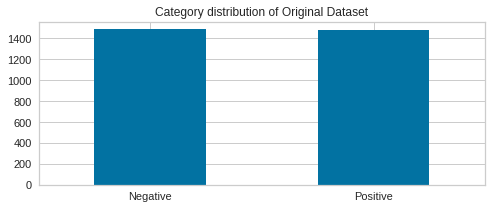

In [147]:
#X_newds['score_name'].value_counts().plot(kind='bar', rot=0)
X_ori_nds=X_newds.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution of Original Dataset',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

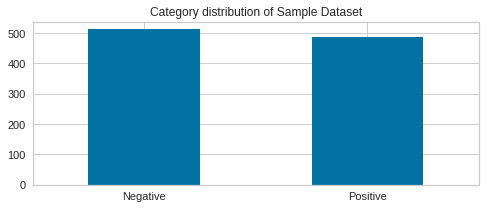

In [148]:
X_ori_nds_sample=X_sample_nds.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution of Sample Dataset',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

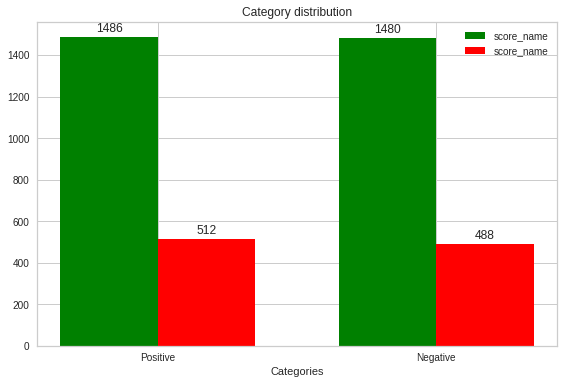

In [149]:
fig, ax = plt.subplots()
sn=['Positive','Negative']
x=np.arange(len(sn))
width=0.35
rects1 = ax.bar(x - width/2, X_newds.score_name.value_counts(), width, label='score_name',color='green')
rects2 = ax.bar(x + width/2, X_sample_nds.score_name.value_counts(), width, label='score_name',color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(sn)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

**FEATURE CREATION**

In [150]:
# takes a like a minute or two to process
X_newds['unigrams'] = X_newds['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [151]:
X_newds[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [153]:
list(X_newds[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]



> **FEATURE SUBSET SELECTION**



In [152]:
#I already define count_vect funct above, so now we only need to call it
X_counts_nds = count_vect.fit_transform(X_newds.sentence)

In [153]:
X_counts_nds

<2966x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [154]:
analyze(" ".join(list(X_newds[4:5].sentence)))

['the', 'mic', 'is', 'great']

In [155]:
#Check shape
X_counts_nds.shape

(2966, 5153)

In [156]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [157]:
X_newds[0:10]

,sentence,score,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Positive,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,Negative,"[What, a, waste, of, money, and, time, !, .]"


In [158]:
# we convert from sparse array to normal array
X_counts_nds[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [159]:
corpus4_nds=X_counts_nds[0:5,0:100].toarray()

In [160]:
#Check index 3 bcs only index 3 ocontain "1". Let's check what its represents to
count_vect.inverse_transform(corpus4_nds[3])

[array(['45'], dtype='<U17')]

In [161]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [162]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [163]:
plot_x_nds = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [164]:
plot_y_nds = ["sentence_"+ str(i) for i in list(X_newds.index)[0:20]]

In [165]:
plot_z_nds = X_counts_nds[0:20, 0:20].toarray() # first 20 terms 
plot_z_nds

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

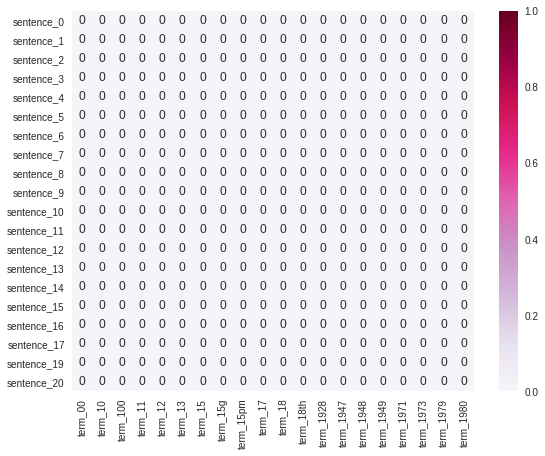

In [166]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z_nds, columns = plot_x_nds, index = plot_y_nds)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

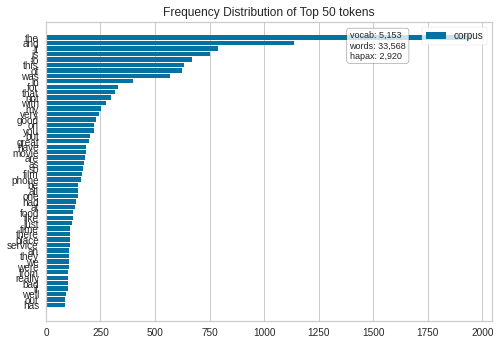

In [167]:
features_names=count_vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features_names)
visualizer.fit(X_counts_nds)
visualizer.poof()

**DIMENSIONALITY REDUCTION**

In [168]:
X_reduced_nds = PCA(n_components=2).fit_transform(X_counts_nds.toarray())

In [169]:
X_reduced_nds.shape

(2966, 2)

Text(0, 0.5, '\nY Label')

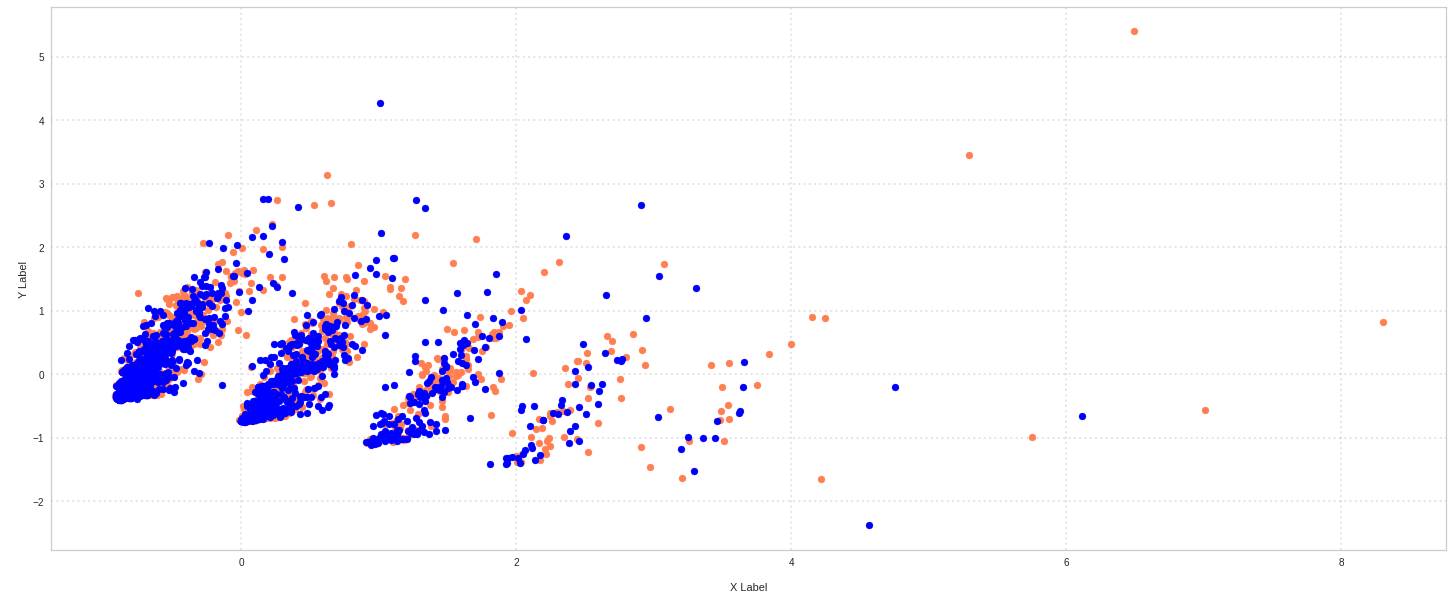

In [170]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, sn):
    xs = X_reduced_nds[X_newds['score_name'] == category].T[0]
    ys = X_reduced_nds[X_newds['score_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')


In [171]:
X_reduced_nds_new = PCA(n_components=3).fit_transform(X_counts_nds.toarray())

In [172]:
X_reduced_nds_new.shape

(2966, 3)

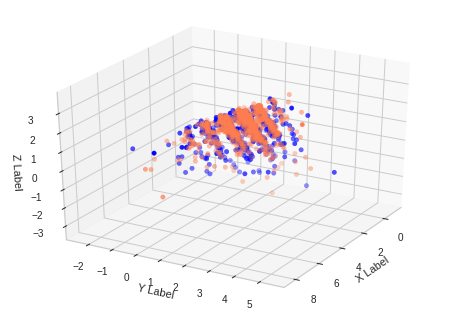

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, sn):
    xs = X_reduced_nds_new[X_newds['score_name'] == category].T[0]
    ys = X_reduced_nds_new[X_newds['score_name'] == category].T[1]
    zs = X_reduced_nds_new[X_newds['score_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=30)
plt.show()

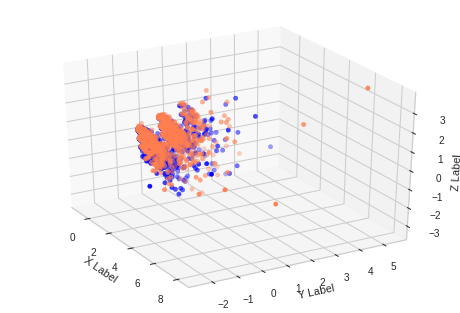

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, sn):
    xs = X_reduced_nds_new[X_newds['score_name'] == category].T[0]
    ys = X_reduced_nds_new[X_newds['score_name'] == category].T[1]
    zs = X_reduced_nds_new[X_newds['score_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=-30)
plt.show()

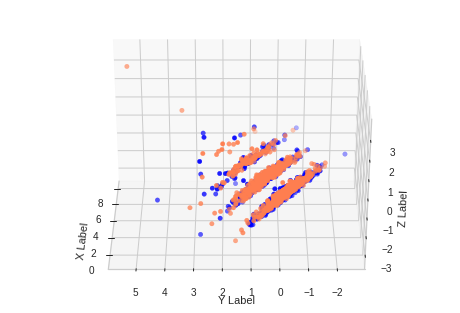

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, sn):
    xs = X_reduced_nds_new[X_newds['score_name'] == category].T[0]
    ys = X_reduced_nds_new[X_newds['score_name'] == category].T[1]
    zs = X_reduced_nds_new[X_newds['score_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=180)
plt.show()

**ATRIBUTE TRANSFORMATION**

In [176]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies_nds = []
for j in range(0,X_counts_nds.shape[1]):
    term_frequencies_nds.append(sum(X_counts_nds[:,j].toarray()))

In [177]:
term_frequencies_nds = np.asarray(X_counts_nds.sum(axis=0))[0]

In [178]:
term_frequencies_nds[0]

1

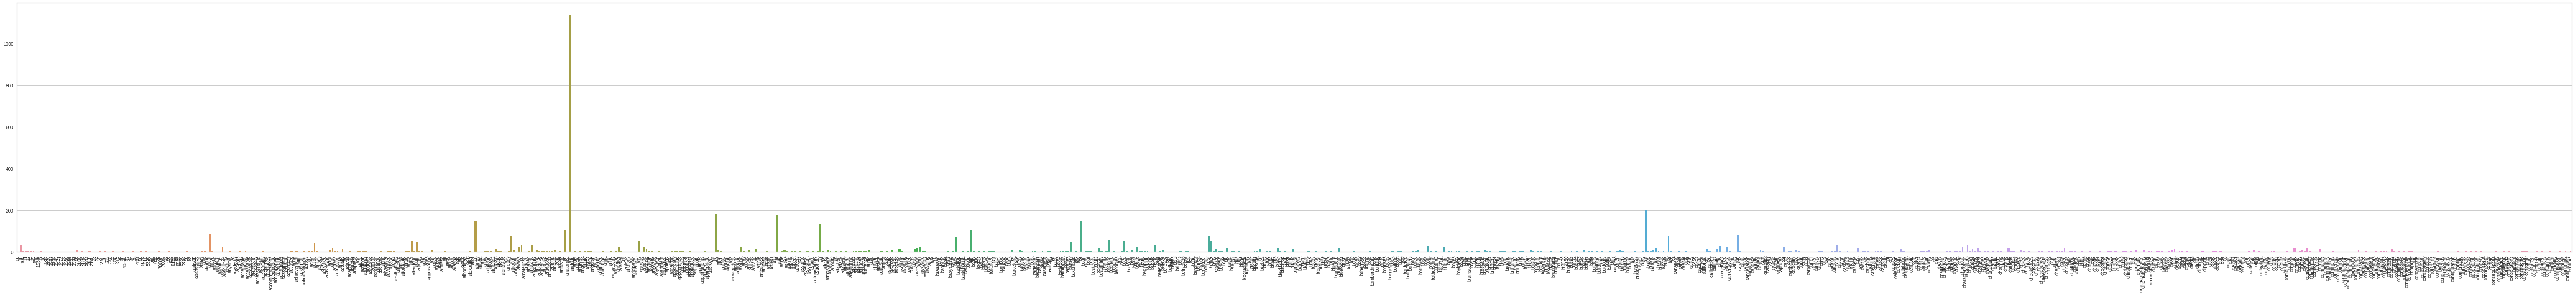

In [179]:
plt.subplots(figsize=(100, 10))
list1 = term_frequencies_nds
list2 = count_vect.get_feature_names()
g = sns.barplot(x=list2[:1000], 
            y=list1[:1000])
g.set_xticklabels(list2, rotation = 90);

In [180]:
# sort terms  in descending order
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

iplot(plot_word_frequency([list2, list1[0:500]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [181]:
term_frequencies_log_nds = [math.log(i) for i in term_frequencies_nds]

In [182]:
iplot(plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log_nds],
                                "Term Frequency Distribution"))

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




**DISCRETIZATION & BINARIZATION**

In [183]:
mlb.fit(X_newds.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [184]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [185]:
X_newds['bin_score'] = mlb.transform(X_newds['score']).tolist()

In [186]:
X_newds[0:10]

,sentence,score,score_name,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,Negative,"[What, a, waste, of, money, and, time, !, .]",[0]


In [187]:
mlb.fit(X_newds.score_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [188]:
mlb.classes_

array(['Negative', 'Positive'], dtype='<U8')

In [189]:
X_newds['bin_category2'] = mlb.transform(X_newds['score_name']).tolist()

In [190]:
X_newds[0:10]

,sentence,score,score_name,unigrams,bin_score,bin_category2
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1],[1]
5,I have to jiggle the plug to get it to line up...,0,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,If you have several dozen or several hundred c...,0,Negative,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,If you are Razr owner...you must have this!,1,Positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,"Needless to say, I wasted my money.",0,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]
9,What a waste of money and time!.,0,Negative,"[What, a, waste, of, money, and, time, !, .]",[0],[0]


# **(30%) THIRD - ATTEMPT FOLLOWING TASK**

*   Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
*   Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
*   Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.






**PREPARATION**


> PREPARE TRAIN AND TEST DATA FROM DATASET THAT WE HAVE



In [191]:
X_newds.head()

,sentence,score,score_name,unigrams,bin_score,bin_category2
0,So there is no way for me to plug it in here i...,0,Negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,Positive,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,Positive,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,Negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,Positive,"[The, mic, is, great, .]",[1],[1]


In [192]:
#raw=X_newds.drop('score_name',axis=1)
raw=X_newds.drop('unigrams',axis=1)

In [193]:
#raw=raw.drop('unigrams',axis=1)
raw=raw.drop('bin_score',axis=1)


In [194]:
#raw=raw.drop('bin_score',axis=1)
raw=raw.drop('bin_category2',axis=1)


In [ ]:
#raw=raw.drop('bin_category2',axis=1)

In [195]:
raw.head()

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,Negative
1,"Good case, Excellent value.",1,Positive
2,Great for the jawbone.,1,Positive
3,Tied to charger for conversations lasting more...,0,Negative
4,The mic is great.,1,Positive


In [196]:
from sklearn.model_selection import train_test_split

In [197]:
x_train,x_test,y_train,y_test=train_test_split(raw.sentence,raw.score,test_size=0.5)

In [198]:
print ('Train samples shape :', x_train.shape)
print ('Train labels shape  :', y_train.shape)
print ('Test samples shape  :', x_test.shape)
print ('Test labels shape   :', y_test.shape)

Train samples shape : (1483,)
Train labels shape  : (1483,)
Test samples shape  : (1483,)
Test labels shape   : (1483,)


**GENERATE MEANINGFUL DATA VISUALIZATION**


> Here I will present different visualizations and data operations. Here I am gonna get all positive words in each positive sentence and calculate & plot the term frequency of the positive words of the dataset.



In [200]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [202]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [203]:
# stopword: commonn words or unimportant words
stopword = stopwords.words('english')

tokens = []

# get tokens from each positive sentence
for sentence in (X_newds['sentence'][X_newds['score']=='1']):
    tokens += dmh.tokenize_text(sentence.lower())

# remove tokens which are in the stopword list
tokens = [token for token in tokens if token not in stopword]

# Categorizing and Tagging Words
tokens_tags = nltk.pos_tag(tokens)

# get the positive tokens from all tokens
positive_tokens = [word for word, pos in tokens_tags if (pos == 'JJ' or pos =='RB')]

In [204]:
positive_tokens_dict = get_tokens_and_frequency(positive_tokens)
iplot(plot_word_frequency([list(positive_tokens_dict[0])[0:25],
                                 list(positive_tokens_dict[1])[0:25]], "Most 25 Positive Words Frequency distribution"))

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [209]:
def plot_word_cloud(text):
    """ Generate word cloud given some input text doc """
    word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(8,6), dpi=90)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [208]:
from wordcloud import WordCloud

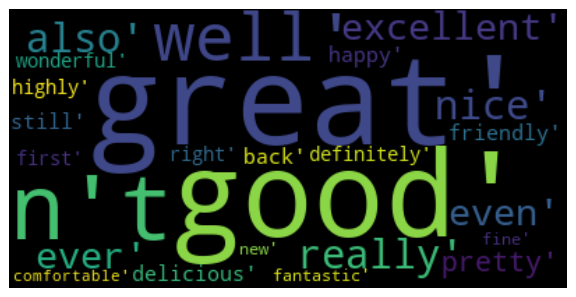

In [210]:
# Display Most 25 Positive Words
plot_word_cloud(str(list(positive_tokens_dict[0])[0:25]))



> Another Visualization



In [213]:
X_tot = np.concatenate((x_train, x_test), axis=0)
y_tot = np.concatenate((y_train, y_test), axis=0)

In [215]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y_tot))

Classes: 
['0' '1']


In [216]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X_tot))))

Number of words: 
2966


Review length: 
Mean 65.76 words (44.127983)


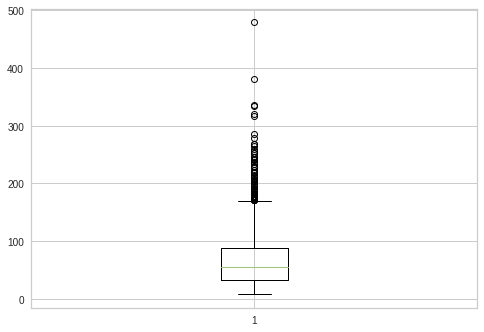

In [218]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_tot]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

**TF-IDF (NAIVE BAYES)**


> Our first TF-IDF Classifier



In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [220]:
#Train
count_vect_t = TfidfVectorizer()
X_counts_train_tf = count_vect_t.fit_transform(x_train)

In [221]:
#TEST
#X_counts_test_tf = count_vect_t.fit_transform(x_test)
X_counts_test_tf = count_vect_t.transform(x_test)

In [222]:
#from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [223]:
#NB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_counts_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [224]:
x_train.shape

(1483,)

In [225]:
x_test.shape

(1483,)

In [226]:
X_counts_train_tf.shape

(1483, 3398)

In [227]:
X_counts_test_tf.shape

(1483, 3398)

In [228]:
y_pred = naive_bayes_classifier.predict(X_counts_test_tf)

In [229]:
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

accuracy:   0.803


In [230]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.79      0.83      0.81       740
    Negative       0.82      0.78      0.80       743

    accuracy                           0.80      1483
   macro avg       0.80      0.80      0.80      1483
weighted avg       0.80      0.80      0.80      1483

confusion matrix:
[[615 125]
 [167 576]]
------------------------------


**WORD FREQUENCY FEATURES (NAIVE BAYES)**


> Our 2nd Classifier (Using Naive bayes and word frequency features)



In [231]:
count_vect = CountVectorizer()
X_counts_train_wf = count_vect.fit_transform(x_train)

In [232]:
X_counts_test_wf = count_vect.transform(x_test)

In [233]:
naive_bayes_classifier.fit(X_counts_train_wf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [234]:
y_pred_wf = naive_bayes_classifier.predict(X_counts_test_wf)

In [235]:
score_wf = metrics.accuracy_score(y_test, y_pred_wf)
print("accuracy:   %0.3f" % score_wf)

accuracy:   0.804


In [236]:
print(metrics.classification_report(y_test, y_pred_wf, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_wf))

print('------------------------------')

              precision    recall  f1-score   support

    Positive       0.79      0.83      0.81       740
    Negative       0.82      0.78      0.80       743

    accuracy                           0.80      1483
   macro avg       0.80      0.80      0.80      1483
weighted avg       0.80      0.80      0.80      1483

confusion matrix:
[[613 127]
 [164 579]]
------------------------------


**COMMENTS :**

> Actually both Tfidfvectorizer and countvector are to convert text data into vectors as model can process only numerical data. But in countvector we only count the number of times a word appears in the documen which results in biasing in favour of most frequent words. this end up in ignoring rare words which could have helped is in processing our data more efficiently.


> In other words, Tfidfvectorizer consider overall document weightage of a word. it help in dealing with most frequent words. Using it we can penalize them. Tfidfvectorizer weight the word counts by a measure of how often they appear in the documents.





# **(10%) FOURTH**


> In the lab, we applied each step really quickly just to illustrate how to work with your dataset. **There are somethings that are not ideal or the most efficient/meaningful**. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.



**ANSWER :**


> Those inefficient part is in countvectorizer, we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this end up in ignoring rare words which could have helped is in processing our data more efficiency. CountVectorizer implement both tokenization and count of occurence. In a corpus, several common words makes up lot of space which carry very little information about content of document. If we feed these counts directly to a classifier then those frequently occuring words will shadow the real interesting terms of the document. The solution is we can re-weight count feature vectors using tf-idf transform method and then fed the data into classifier for better classification.



> Amm... Actually, in this lab session you provide three kind of dataset. And for the preparation of each dataset we have to treat it differently. For example for IMDB dataset. If I use the usual load dataset (usual read files to load the data) and only use "\t" to split each sentence, the results is I can't load the whole data (I only successfully load around 740 something records). That's why we have to use regular expression (improt re) to make the pattern to extract each sentence as I mention in my code. For example we have to pay attention of each sentence without last digit, seach whether if sentence contain a digit at the end or not and then store it. So we can load all of the record by using pattern which compile by regular expression. Anyway, because the data has same structure (sentence and score) we can concate those 3 dataset to be more efficient.



> Well, see that pre-processing and cleansing the data is an ordinary data pre-processing task. and how we can improve it? First we have to do textual data analysis (because the lack of structure. I mean different data has different behavior so we have to carefully analyze it). Another thing is text mining approach. we have to find solid text mining method otherwise we will not be able to compute numerical features (there are going to be no classifier trained).

> For the preprocessing task there are some step that we have to do to improve our preprocessing : 

1.   Get rid of the punctuation charcter
2.   Get rid of the numbers and numerals (bcs we want to perform a qualitative analysis)
3.   Remove stop words
4.   converting the ntire text into lower case bcs a computer usually interpret case sensitive words as two different term 
5.   Applying porter stemmer to reduce the words or terms to their roots)
6.   Grouping terms by documents
7.   Extracting keyword from the grouped term (only consider the most important items in our dataset)
8.   Converting extracted keywords into sparse vector or what we called vectorization.















# **(10%) FIFTH**


> It's hard for us to follow if your code is messy :'(, so please tidy up your notebook and add minimal comments where needed. This part is worth 10% of your grade.


> Upload your solution notebook to your Github repository and send a link with allowed access to my email: **fhcalderon87@gmail.com** BEFORE the deadline (**Dec. 14th 11:59 pm, Monday**).





**ANSWER**


> I did... Hope you're not confuse while reading my code :'(

